# [NTDS'19] tutorial 4: Manipulating graphs with NetworkX
[ntds'19]: https://github.com/mdeff/ntds_2019

[Effrosyni Simou](https://people.epfl.ch/effrosyni.simou), [EPFL LTS4](https://lts4.epfl.ch).
Adapted from [NTDS'17 NetworkX demo](https://nbviewer.jupyter.org/github/mdeff/ntds_2017/blob/outputs/demos/04_networkx.ipynb).

In this session we will get introduced to NetworkX, explore some of the most common network models, look at their basic properties and compare them.

## 1 Creating graphs using network models

There are many libraries that deal with creation and manipulation of graph data.
We will use NetworkX to create basic network models, as they are already implemented in the library.
The full documentation of NetworkX 2.3 (installed in your `ntds_2019` environment) can be found [online](https://networkx.github.io/documentation/stable/).

In [1]:
%matplotlib inline

import collections

import numpy as np
from scipy import spatial
from matplotlib import pyplot as plt
import networkx as nx

Create an Erdős-Rényi graph with $N=100$ vertices, and a probability of connecting each pair of vertices equal to $p=0.15$.

In [2]:
N = 100  # number of nodes
p = 0.15  # probability of connection
er = nx.erdos_renyi_graph(N, p)

You can retrieve the adjacency matrix of the graph, from the `Graph` object `er` as follows:

In [3]:
er_adj = nx.adjacency_matrix(er, range(N))
er_adj = er_adj.todense()

You can now visualise the adjacency matrix:

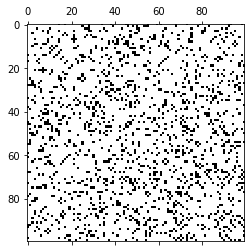

In [4]:
plt.spy(er_adj);

## 2 Plotting graphs

With NetworkX and Matplotlib we can also plot a graph. For example, we can plot the Erdős-Rényi graph that we created before as follows:

/home/michael/.conda/envs/ntds_2019/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


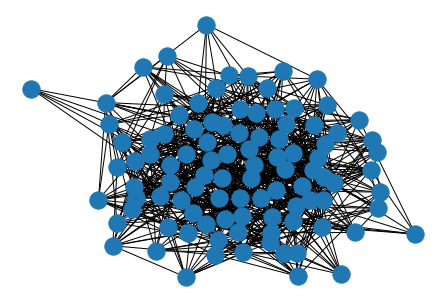

In [5]:
nx.draw(er)

### 2.1 Exercise

Create a Barabasi-Albert graph and a Watts-Strogatz graph and plot them.

In [ ]:
# Create a Barabasi-Albert graph.
ba =  # your code here

In [ ]:
# Create a Watts-Strogartz graph.
ws =  # your code here

## 3 Modifying graphs

It's easy to add or remove edges, but also nodes. If we add an edge between nodes that don't yet exist, they will be automatically created.

In [6]:
er.add_node(100)

In [7]:
er.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

Similarly, you can add and remove a collection of nodes or edges, and add and remove one node or edge:
* Adding nodes with:
    * `G.add_node`: One node at a time
    * `G.add_nodes_from`: A container of nodes
* Adding edges with:
    * `G.add_edge`: One edge at a time
    * `G.add_edges_from`: A container of edges
* Removing nodes with:
    * `G.remove_node`: One node at a time
    * `G.remove_nodes_from`: A container of nodes
* Removing edges with:
    * `G.remove_edge`: One edge at a time
    * `G.remove_edges_from`: A container of edges

You can get the number of edges with `G.size()`.

Add an edge between two non-existant vertices. Remove all nodes up to node 50. Draw the graph after each change.

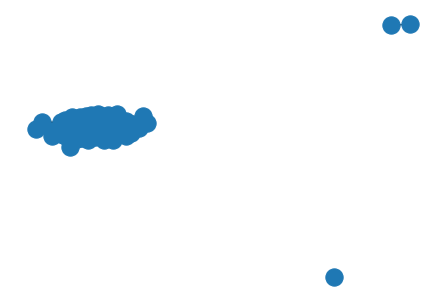

In [8]:
er.add_edge(101, 102)
nx.draw(er)

NodeView((50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102))

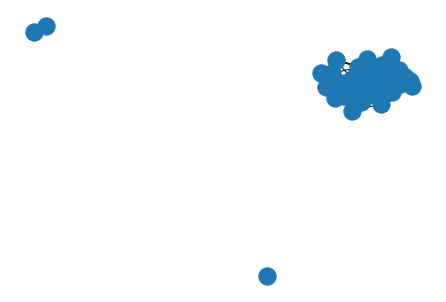

In [9]:
er.remove_nodes_from(range(50))
nx.draw(er)
er.nodes()

In [10]:
er.size()

212

## 4 Degree distribution

`G.degree()` returns a ``DegreeView`` object with pairs of nodes and their degree.
If we specify a node, `G.degree(node)` will return the degree of that node.

Create an Erdős-Rényi network and plot a histogram of node degrees.  

In [11]:
N = 100  # number of nodes
p = 0.15  # probability of connection
er = nx.erdos_renyi_graph(N, p)

In [12]:
d = er.degree()

In [13]:
print(d)

[(0, 15), (1, 23), (2, 22), (3, 16), (4, 14), (5, 19), (6, 14), (7, 19), (8, 22), (9, 18), (10, 17), (11, 15), (12, 16), (13, 19), (14, 13), (15, 13), (16, 9), (17, 17), (18, 19), (19, 16), (20, 17), (21, 13), (22, 12), (23, 19), (24, 12), (25, 8), (26, 18), (27, 13), (28, 15), (29, 12), (30, 18), (31, 15), (32, 11), (33, 20), (34, 12), (35, 11), (36, 15), (37, 13), (38, 19), (39, 17), (40, 12), (41, 15), (42, 17), (43, 19), (44, 12), (45, 22), (46, 24), (47, 21), (48, 8), (49, 13), (50, 11), (51, 17), (52, 17), (53, 13), (54, 15), (55, 13), (56, 12), (57, 16), (58, 15), (59, 19), (60, 13), (61, 19), (62, 16), (63, 19), (64, 21), (65, 18), (66, 22), (67, 14), (68, 15), (69, 17), (70, 13), (71, 12), (72, 10), (73, 7), (74, 13), (75, 16), (76, 15), (77, 12), (78, 22), (79, 12), (80, 19), (81, 17), (82, 16), (83, 15), (84, 17), (85, 18), (86, 16), (87, 13), (88, 17), (89, 18), (90, 13), (91, 11), (92, 17), (93, 17), (94, 27), (95, 20), (96, 16), (97, 14), (98, 16), (99, 10)]


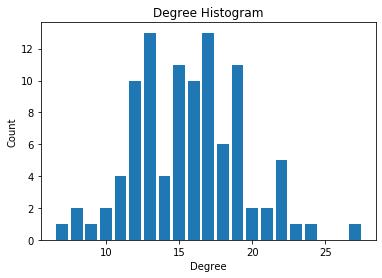

In [14]:
# Erdős-Rényi node degree histogram.
degree_sequence = sorted([d for n, d in er.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
ax.bar(deg, cnt)
ax.set_title("Degree Histogram")
ax.set_ylabel("Count")
ax.set_xlabel("Degree");

### 4.1 Fitting a distribution

Try to fit a Poisson distribution.

In [15]:
# Poisson distribution.
def poisson(mu, k):
    return np.exp(-mu) * mu**k * (np.math.factorial(k)**-1)

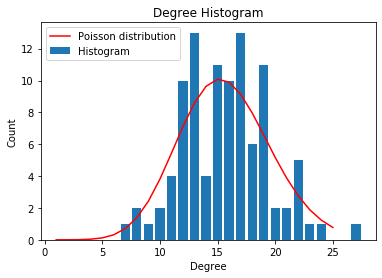

In [16]:
# Erdős-Rényi node degree histogram.
degree_sequence = sorted([d for n, d in er.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
ax.bar(deg, cnt, label='Histogram')

# Poisson distribution
mu = 2 * er.size() / 100
k = np.linspace(1, 25, 25)
deg = [100 * poisson(mu, i) for i in k]
ax.plot(k, deg, color='r', label='Poisson distribution')

ax.legend()
ax.set_title("Degree Histogram")
ax.set_ylabel("Count")
ax.set_xlabel("Degree");

### 4.2 Exercise

Do it for the Barabasi-Albert and Watts-Strogatz networks.

In [ ]:
# your code here

## 5 Creating a graph that approximates a manifold

We can represent data laying on a manifold (sampled from a manifold) as a graph of connected samples.


Generate 100 two-dimensional data points from a uniform random distribution in $[0, 1]$.
These will be the coordinates of your nodes.

In [17]:
N = 100
nodes_coords = np.random.rand(N, 2)

Two nodes are connected if the Euclidean distance between them is smaller than a threshold.
In that case, the weight of the edge is set to
$$w(i,j) = \exp \left( -{\frac{\operatorname{dist}^2(i,j)}{2\sigma^2}} \right),$$
for some *kernel width* $\sigma$.

In [18]:
sigma = 0.9
threshold = 0.2

In [19]:
def gaussian_kernel(dist, sigma):
    return np.exp(-dist**2 / (2*sigma**2))

In [20]:
dist = spatial.distance.pdist(nodes_coords, metric='euclidean')
dist = spatial.distance.squareform(dist)
adj = gaussian_kernel(dist, sigma)
adj -= np.identity(N)
adj[dist > threshold] = 0

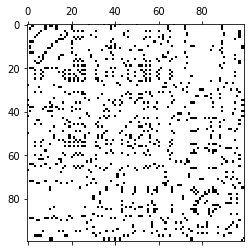

In [21]:
plt.spy(adj);

Plot the graph with NetworkX. 

Hints: 
* `nx.from_numpy_array(adj)` creates a graph object from an adjacency matrix (in numpy form)
* `nx.draw(G,pos)` will draw vertices at coordinates specified in pos. Variable pos is a dictionary assigning a pair of coordinates to each node.

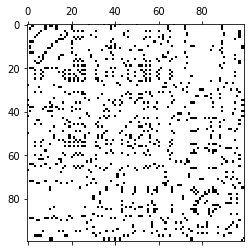

In [22]:
g = nx.from_numpy_matrix(adj)
plt.spy(nx.adjacency_matrix(g).todense());

/home/michael/.conda/envs/ntds_2019/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


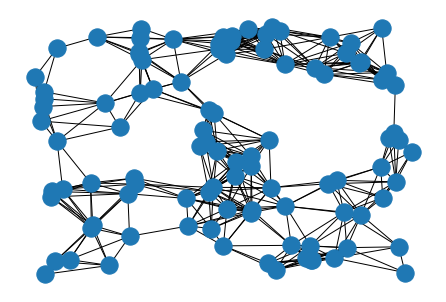

In [23]:
pos = dict(zip(range(N), nodes_coords))
nx.draw(g, pos)

Plot a degree distribution of this graph. What can you say about the distribution?

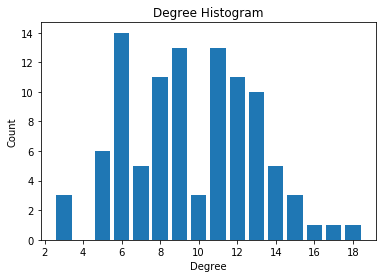

In [24]:
# node degree histogram
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
ax.bar(deg, cnt)
ax.set_title("Degree Histogram")
ax.set_ylabel("Count")
ax.set_xlabel("Degree");